In [20]:
import sys

import numpy as np
import pandas as pd

sys.path.append("../../../")

from helpers.split import tag_label_feature_split, label_strings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [21]:
# load data and separate one hot encoded labels from features,
# transform one hot encoded labels into label strings,
# then encode label strings

df = pd.read_pickle("../../../datasets/baseline_dataset_2.pickle")
_, one_hot_labels, X = tag_label_feature_split(df)
labels=label_strings(one_hot_labels)

le = LabelEncoder()
y = le.fit_transform(pd.Series.ravel(labels))

In [22]:
# take a look at our label classes

le.classes_

array(['genre_blues', 'genre_classical', 'genre_country', 'genre_disco',
       'genre_hiphop', 'genre_jazz', 'genre_metal', 'genre_pop',
       'genre_reggae', 'genre_rock'], dtype=object)

In [23]:
#dense encoded label classes

y

array([7, 9, 7, ..., 5, 7, 5])

In [24]:
# recover labels from dense encodings

le.inverse_transform(y)

array(['genre_pop', 'genre_rock', 'genre_pop', ..., 'genre_jazz',
       'genre_pop', 'genre_jazz'], dtype=object)

In [25]:
# divide into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [26]:
# take a look at the shapes of our data sets
# and the ratio of training set to test set

print (f"{X_train.shape=} {y_train.shape=}\n{X_test.shape=}   {y_test.shape=}")
print (f"ratio of train to test data set sizes = {round(len(y_train)/len(y_test), 3)}")

X_train.shape=(17080, 182) y_train.shape=(17080,)
X_test.shape=(4271, 182)   y_test.shape=(4271,)
ratio of train to test data set sizes = 3.999


In [27]:
# review distribution of labels overall

round(labels.value_counts()/len(labels), 3)

label          
genre_pop          0.250
genre_classical    0.247
genre_rock         0.187
genre_hiphop       0.100
genre_jazz         0.073
genre_reggae       0.046
genre_metal        0.039
genre_blues        0.022
genre_country      0.019
genre_disco        0.017
dtype: float64

In [28]:
# standardize features

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [49]:
# create logistic regression model
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial', class_weight='balanced', max_iter=300)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight='balanced', max_iter=300,
                   multi_class='multinomial')

In [50]:
predictions = lr.predict(X_test_std)

In [51]:
score = lr.score(X_test_std, y_test)
print(score)

0.49613673612737064


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [54]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 27   8   7   7   3   9   5   7   5  16]
 [ 41 816  34  13  10  66  14  33   7  21]
 [  7   5  47   2   2   5   3   8   2   1]
 [  2   0   4  35   9   5   1   9   6   1]
 [ 14   8   8  49 187  25   4  34  76  20]
 [ 20  33  11  24  14 171   2  19   8   9]
 [  4   1   2   4   2   0 126   2   1  24]
 [118  62 106 131  68 116  34 250  50 134]
 [ 13   2   5  17  22   3   1   8 121   5]
 [ 62  18  42  47  18  21 187  49  17 339]]


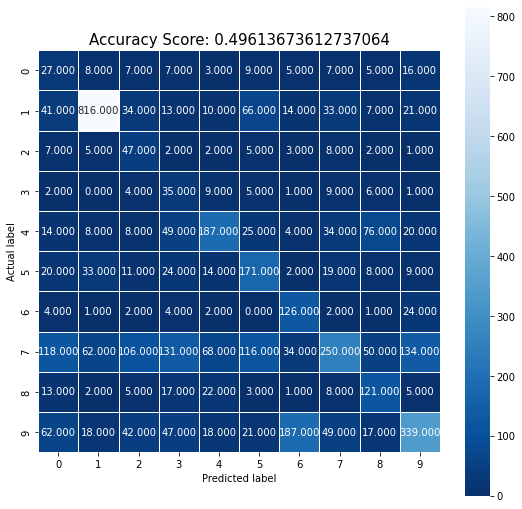

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);